### Active Coutour Models

### Funcion Mostrar Imagen

In [79]:
import matplotlib.pyplot as plt
def mostrar_imagen(imagen):
    fig,ax=plt.subplots(figsize=[7,6])
    ax.imshow(imagen,cmap=plt.cm.gray)    
    plt.show()

### Leer imagen

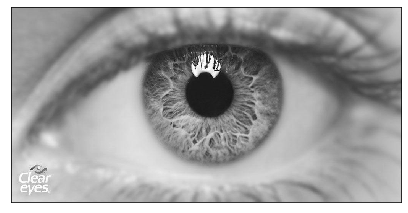

In [8]:
import skimage.io as io
from skimage.color import rgb2gray
imagen_original = io.imread(fname="images/iris_pattern.jpg")
imagen = rgb2gray(imagen_original)
mostrar_imagen(imagen)

### Mostrar Histograma

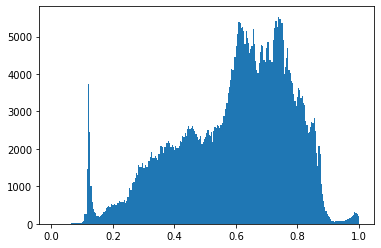

In [16]:
plt.hist(imagen.ravel(),bins=255)
plt.show()

### Filtro Ojo Negro

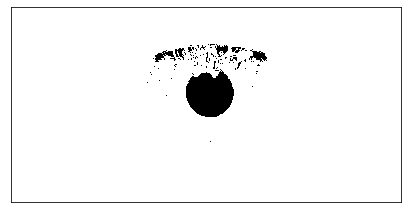

In [24]:
image_black=imagen.copy()
image_black[imagen<0.2] = 0
image_black[imagen>0.2] = 1
mostrar_imagen(image_black)

### Remove Noise

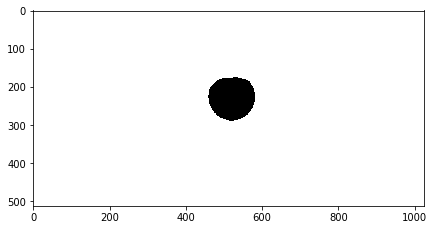

In [80]:
from skimage.filters.rank import median
from skimage.morphology import disk
image_remove_noise=median(image_black,disk(25))
mostrar_imagen(image_remove_noise)

520.4243955250812
229.95470949115844


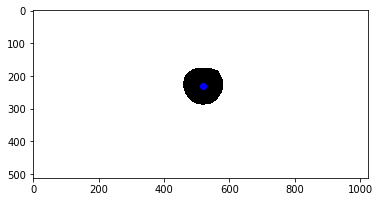

In [140]:
import numpy as np 
eye_retine_image = np.where(image_remove_noise == 0)
center_x=np.mean(eye_retine_image[1])
center_y=np.mean(eye_retine_image[0])
print(center_x)
print(center_y)
plt.plot(center_x,center_y,'bo')
plt.imshow(image_remove_noise,cmap=plt.cm.gray)
plt.show()

### Dibujar Graficas Centro

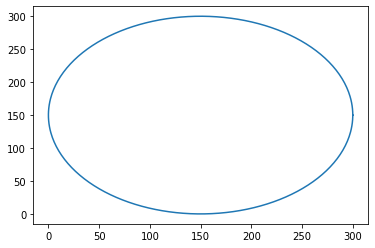

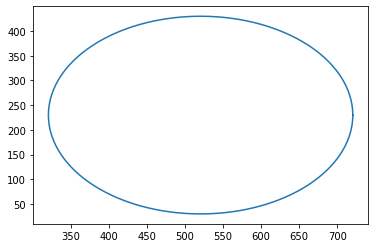

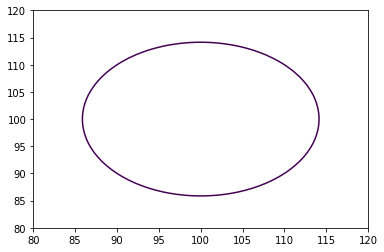

In [190]:
s=np.linspace(0,2*np.pi,400)
fx=150+150*np.cos(s)
fy=150+150*np.sin(s)
fxy_sincos=np.array([fx,fy]).T

plt.plot(fxy_sincos[:,0],fxy_sincos[:,1])
plt.show()

s=np.linspace(0,2*np.pi,400)
r=center_x+200*np.cos(s)
c=center_y+200*np.sin(s)
fxyc_sincos=np.array([r,c]).T
plt.plot(fxyc_sincos[:,0],fxyc_sincos[:,1])
plt.show()



x = np.linspace(80, 120)
y = np.linspace(80, 120)
X, Y = np.meshgrid(x,y)
fxy = (X-100)**2 + (Y-100)**2 - 200
plt.contour(X,Y,fxy,[0])
plt.show()

### Eliminar detalles filtro gaussiano

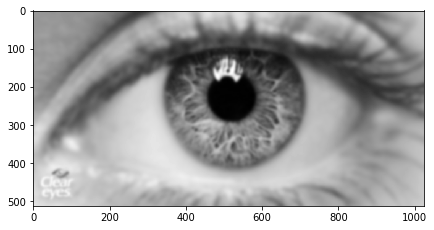

In [175]:
from skimage.filters import gaussian
imagen_filtro_gaus=gaussian(imagen,3)
mostrar_imagen(imagen_filtro_gaus)

### Active contour

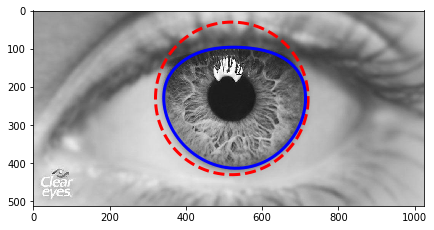

In [200]:
from skimage.segmentation import active_contour
s=np.linspace(0,2*np.pi,400)
r=center_x+200*np.cos(s)
c=center_y+200*np.sin(s)
init=np.array([c,r]).T
snake = active_contour(gaussian(imagen,3),init,alpha=0.015,beta=40,gamma=0.001,coordinates='rc')
fig,ax=plt.subplots(figsize=[7,6])
ax.imshow(imagen,cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
plt.show()

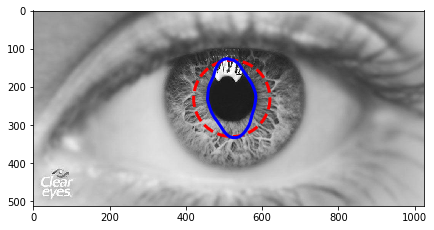

In [205]:
from skimage.segmentation import active_contour
s=np.linspace(0,2*np.pi,400)
r=center_x+100*np.cos(s)
c=center_y+100*np.sin(s)
init=np.array([c,r]).T
snake = active_contour(gaussian(imagen,3),init,alpha=0.015,beta=40,gamma=0.0001,coordinates='rc')
fig,ax=plt.subplots(figsize=[7,6])
ax.imshow(imagen,cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
plt.show()

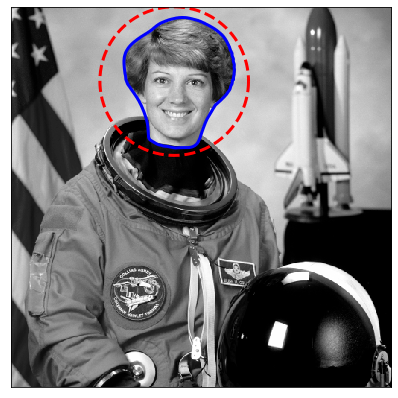